# Online News Popularity


## Introduction

Online News Popularity dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity). 

The dataset has a 61 attributes, all of them non-null. The below is an exploratory analysis of this dataset. 



In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
%matplotlib inline
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [221]:
news_pop = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv', sep='\s*,\s*', engine='python')

In [277]:
#pd.DataFrame(news_pop.columns)


In [223]:
news_pop.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

In [224]:
#news_pop.info()

In [225]:
#news_pop.dtypes

## Data Cleanup

### Converting the columns 13 to 17 (data channel boolean indicators) to a single column indicating the channel type

First verify whether there's any url that's marked True for more than one channel type

In [226]:
sum_all_inds = news_pop.iloc[:, [13,14,15,16,17,18]].sum(1)
any(sum_all_inds > 1)

False

Verify whether there's any url that's not marked True for at least one channel type

In [227]:
any(sum_all_inds < 1)

True

In [228]:
sum(sum_all_inds < 1)

6134

6134 urls are not classified as any of the 6 data channel types

In [229]:
news = news_pop
is_data_channel_cols = news.columns[13:19]
# Add a new column that will hold the column name (from is_data_channel_xx) with the max value (1). 
news['data_channel'] = news[ list(is_data_channel_cols)].idxmax(axis=1)
# In case of ties, ie when all is_data_channel_xx is 0 the above column will have the name of the 1st column. Set those to None
news.ix[sum_all_inds < 1, 'data_channel'] = 'Unknown'
news.replace('data_channel_is_', '', regex= True, inplace= True)
#news.info()

### Converting the columns 31 to 37 (weekday boolean indicators) to a single column indicating the day of week

In [230]:
# Verifying data correctness. Is any row marked 1 for more than one week day or less than one week day
sum_all = news.iloc[:, [31,32,33,34,35,36,37]].sum(1)
any(sum_all >1 )
any(sum_all < 1)

False

In [231]:
is_weekday_cols = news.columns[31:38]
# Add a new column that will hold the column name (from weekday_is_xx) with the max value (1). 
news['day_of_week'] = news[ list(is_weekday_cols)].idxmax(axis=1)
news.replace('weekday_is_', '', regex= True, inplace= True)
#news.head(20)

#### Removing the transformed columns

In [232]:
list(is_weekday_cols)
list (is_data_channel_cols)

['data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world']

In [233]:
news.drop(list(is_data_channel_cols), axis=1, inplace= True)
news.drop(list(is_weekday_cols), axis = 1, inplace= True)
#news.info()

## Exploratory Analysis

In [278]:
#news.columns.tolist()

### How does #Shares vary with key attributes of the article?

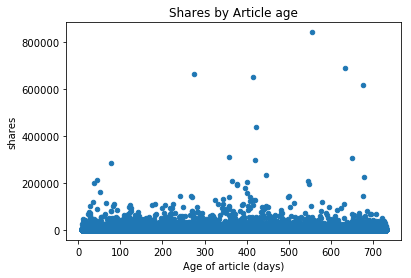

In [252]:
ax = news.plot(x='timedelta',y= 'shares', kind='scatter', title = 'Shares by Article age')
ax.set_xlabel('Age of article (days)')

We don't see any pattern where shares increase with age of the news item.

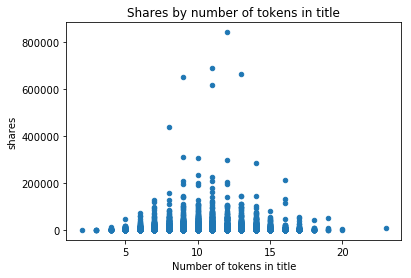

In [253]:
ax = news.plot(x='n_tokens_title', y = 'shares', kind = 'scatter', title = 'Shares by number of tokens in title')
ax.set_xlabel('Number of tokens in title')

There seems to be a peak in no of shares when the no of tokens in title is between 9 and 12

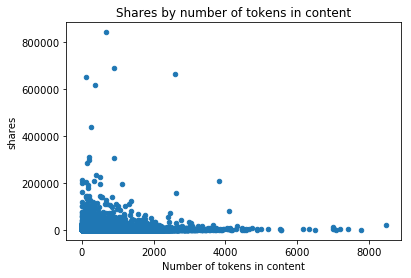

In [254]:
ax = news.plot(x='n_tokens_content', y = 'shares', kind = 'scatter', title = 'Shares by number of tokens in content')
ax.set_xlabel('Number of tokens in content')

There's a clear pattern where smaller articles tend to get more shares

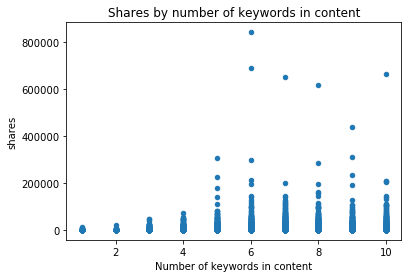

In [259]:
ax = news.plot(x='num_keywords', y = 'shares', kind = 'scatter', title = 'Shares by number of keywords in content')
ax.set_xlabel('Number of keywords in content')

The ideal no of keywords appears to be between 5 and 10 for maximum shares

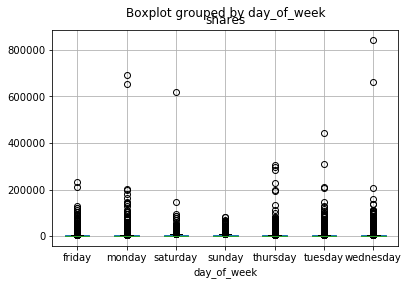

In [240]:
news.boxplot(['shares'], 'day_of_week')


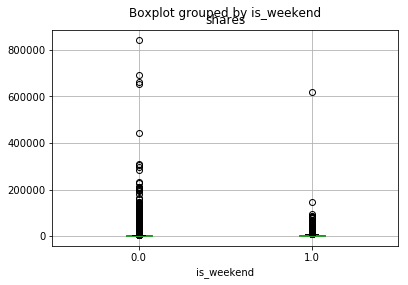

In [260]:
news.boxplot(['shares'], 'is_weekend')


Weekdays have an edge in getting more no of shares

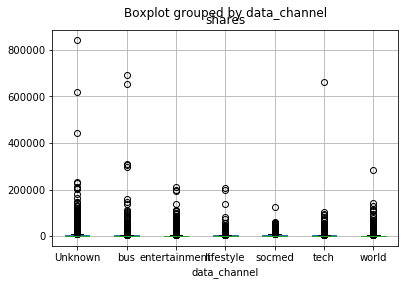

In [261]:
news.boxplot(['shares'], 'data_channel')

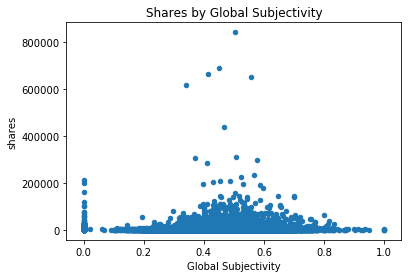

In [262]:
ax = news.plot(x='global_subjectivity',y= 'shares', kind='scatter', title = 'Shares by Global Subjectivity')
ax.set_xlabel('Global Subjectivity')

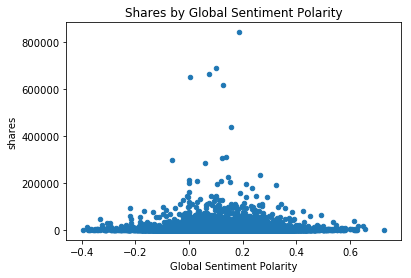

In [263]:
ax = news.plot(x='global_sentiment_polarity',y= 'shares', kind='scatter', title = 'Shares by Global Sentiment Polarity')
ax.set_xlabel('Global Sentiment Polarity')

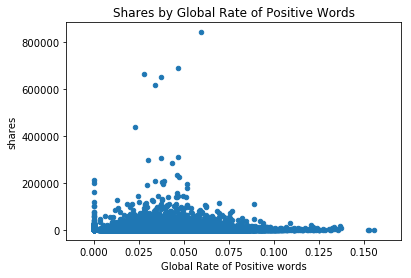

In [264]:
ax = news.plot(x='global_rate_positive_words',y= 'shares', kind='scatter', title = 'Shares by Global Rate of Positive Words')
ax.set_xlabel('Global Rate of Positive words')

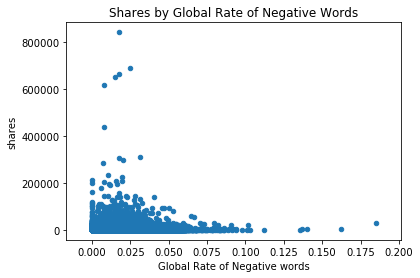

In [265]:
ax = news.plot(x='global_rate_negative_words',y= 'shares', kind='scatter', title = 'Shares by Global Rate of Negative Words')
ax.set_xlabel('Global Rate of Negative words')

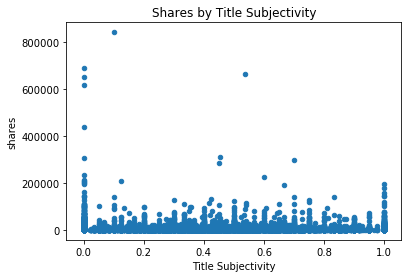

In [275]:
ax = news.plot(x='title_subjectivity',y= 'shares', kind='scatter', title = 'Shares by Title Subjectivity')
ax.set_xlabel('Title Subjectivity')

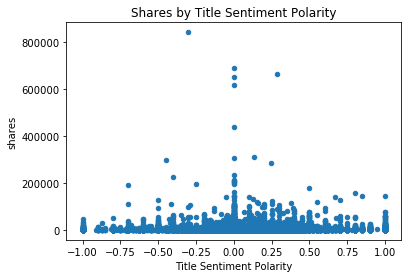

In [276]:
ax = news.plot(x='title_sentiment_polarity',y= 'shares', kind='scatter', title = 'Shares by Title Sentiment Polarity')
ax.set_xlabel('Title Sentiment Polarity')